In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Set the path to the git folder and the asset folder
git_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML'))
asset_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML-Assets'))

print("Path to git folder:", git_folder)
print("Path to asset folder:", asset_folder)

# Read Parquet file
file_path = os.path.join(asset_folder, 'bronze', 'heroysund_sensors', '2021', '02', '20210201083943.parquet')
data = pd.read_parquet(file_path)
display(data)

Path to git folder: c:\Users\erlih\repos\HeroysundBridge-ML
Path to asset folder: c:\Users\erlih\repos\HeroysundBridge-ML-Assets


Point_1_N  Point_2_N  Point_3_N   Point_4_S   Point_5_S   Point_6_S  \
0     -71.445633 -72.283882 -65.799652 -227.943542 -234.919922 -227.402725   
1     -71.526756 -72.494797 -65.750984 -228.268021 -234.779312 -226.553665   
2     -71.483490 -72.738159 -65.437317 -228.770966 -235.001038 -226.959259   
3     -71.532158 -72.689484 -65.632004 -228.208542 -234.973999 -227.884033   
4     -71.364510 -72.181129 -65.951080 -228.549240 -235.271439 -226.807831   
...          ...        ...        ...         ...         ...         ...   
72029 -69.309456 -71.142784 -65.161507 -226.131851 -233.340775 -224.925842   
72030 -69.017426 -71.472679 -65.312927 -226.191330 -233.156891 -225.250320   
72031 -69.417618 -71.586243 -64.896507 -226.115631 -233.346176 -225.196243   
72032 -69.368942 -71.586243 -64.945183 -226.364395 -233.438110 -224.915024   
72033 -69.806999 -72.035110 -65.275070 -226.029099 -233.838303 -225.190826   

        Omega_N   Omega_S  PT100_Temperature  
0      0.465558 -0.000250          -4.478031  
1      0.465498 -0.000244          -4.476759  
2      0.465526 -0.000271          -4.477183  
3      0.465556 -0.000350          -4.477607  
4      0.465534 -0.000284          -4.478455  
...         ...       ...                ...  
72029  0.470418  0.000719          -4.541609  
72030  0.470416  0.000752          -4.542457  
72031  0.470433  0.000699          -4.543304  
72032  0.470450  0.000772          -4.542457  
72033  0.470379  0.000761          -4.542457  

[72034 rows x 9 columns]

**Total temprature/strain relation**

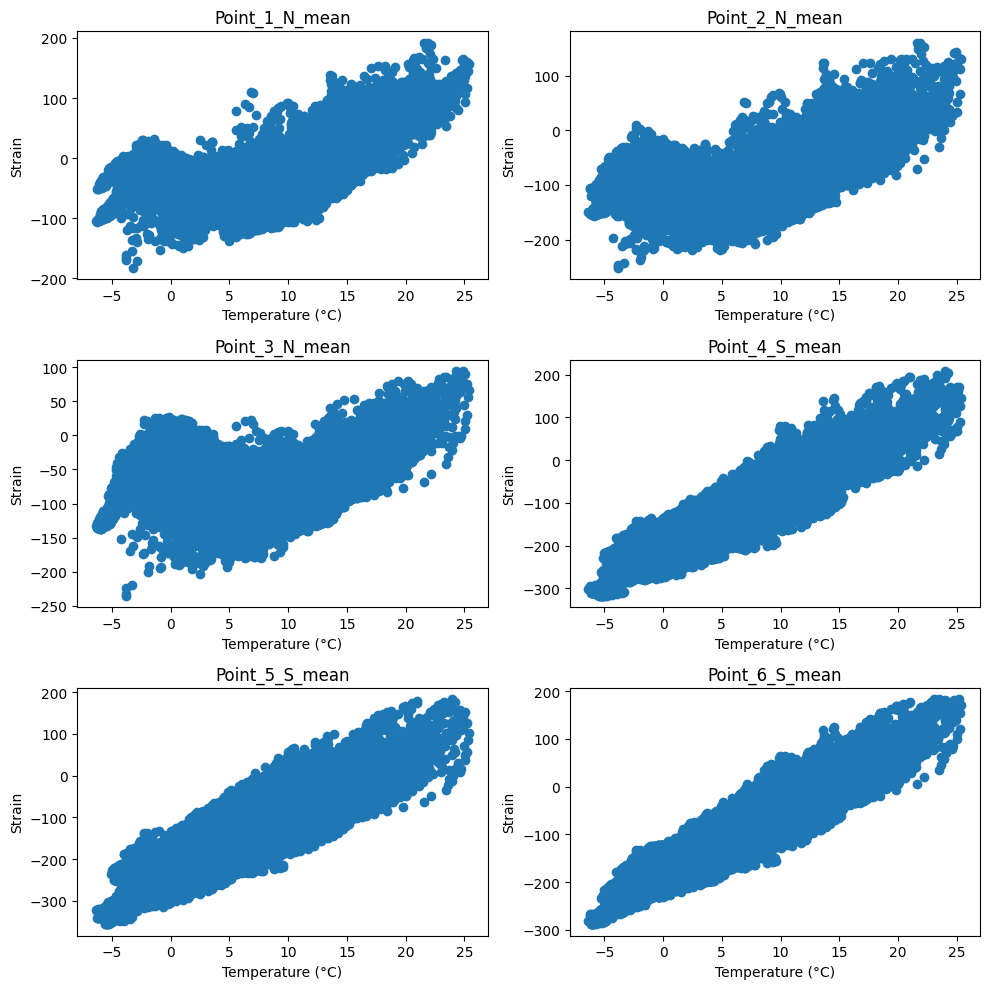

In [25]:
# Define the strain points and temperature column
strain_columns = ['Point_1_N_mean', 'Point_2_N_mean', 'Point_3_N_mean', 'Point_4_S_mean', 'Point_5_S_mean', 'Point_6_S_mean']
temperature_column = 'PT100_Temperature_mean'

fig, axs = plt.subplots(3, 2, figsize=(10, 10)) 
axs = axs.flatten()  

# Plot each strain point against temperature
for i, point in enumerate(strain_columns):
    axs[i].scatter(data[temperature_column], data[point])
    axs[i].set_title(point)
    axs[i].set_xlabel('Temperature (°C)')
    axs[i].set_ylabel('Strain')

plt.tight_layout()
plt.show()

**Relation split in years**

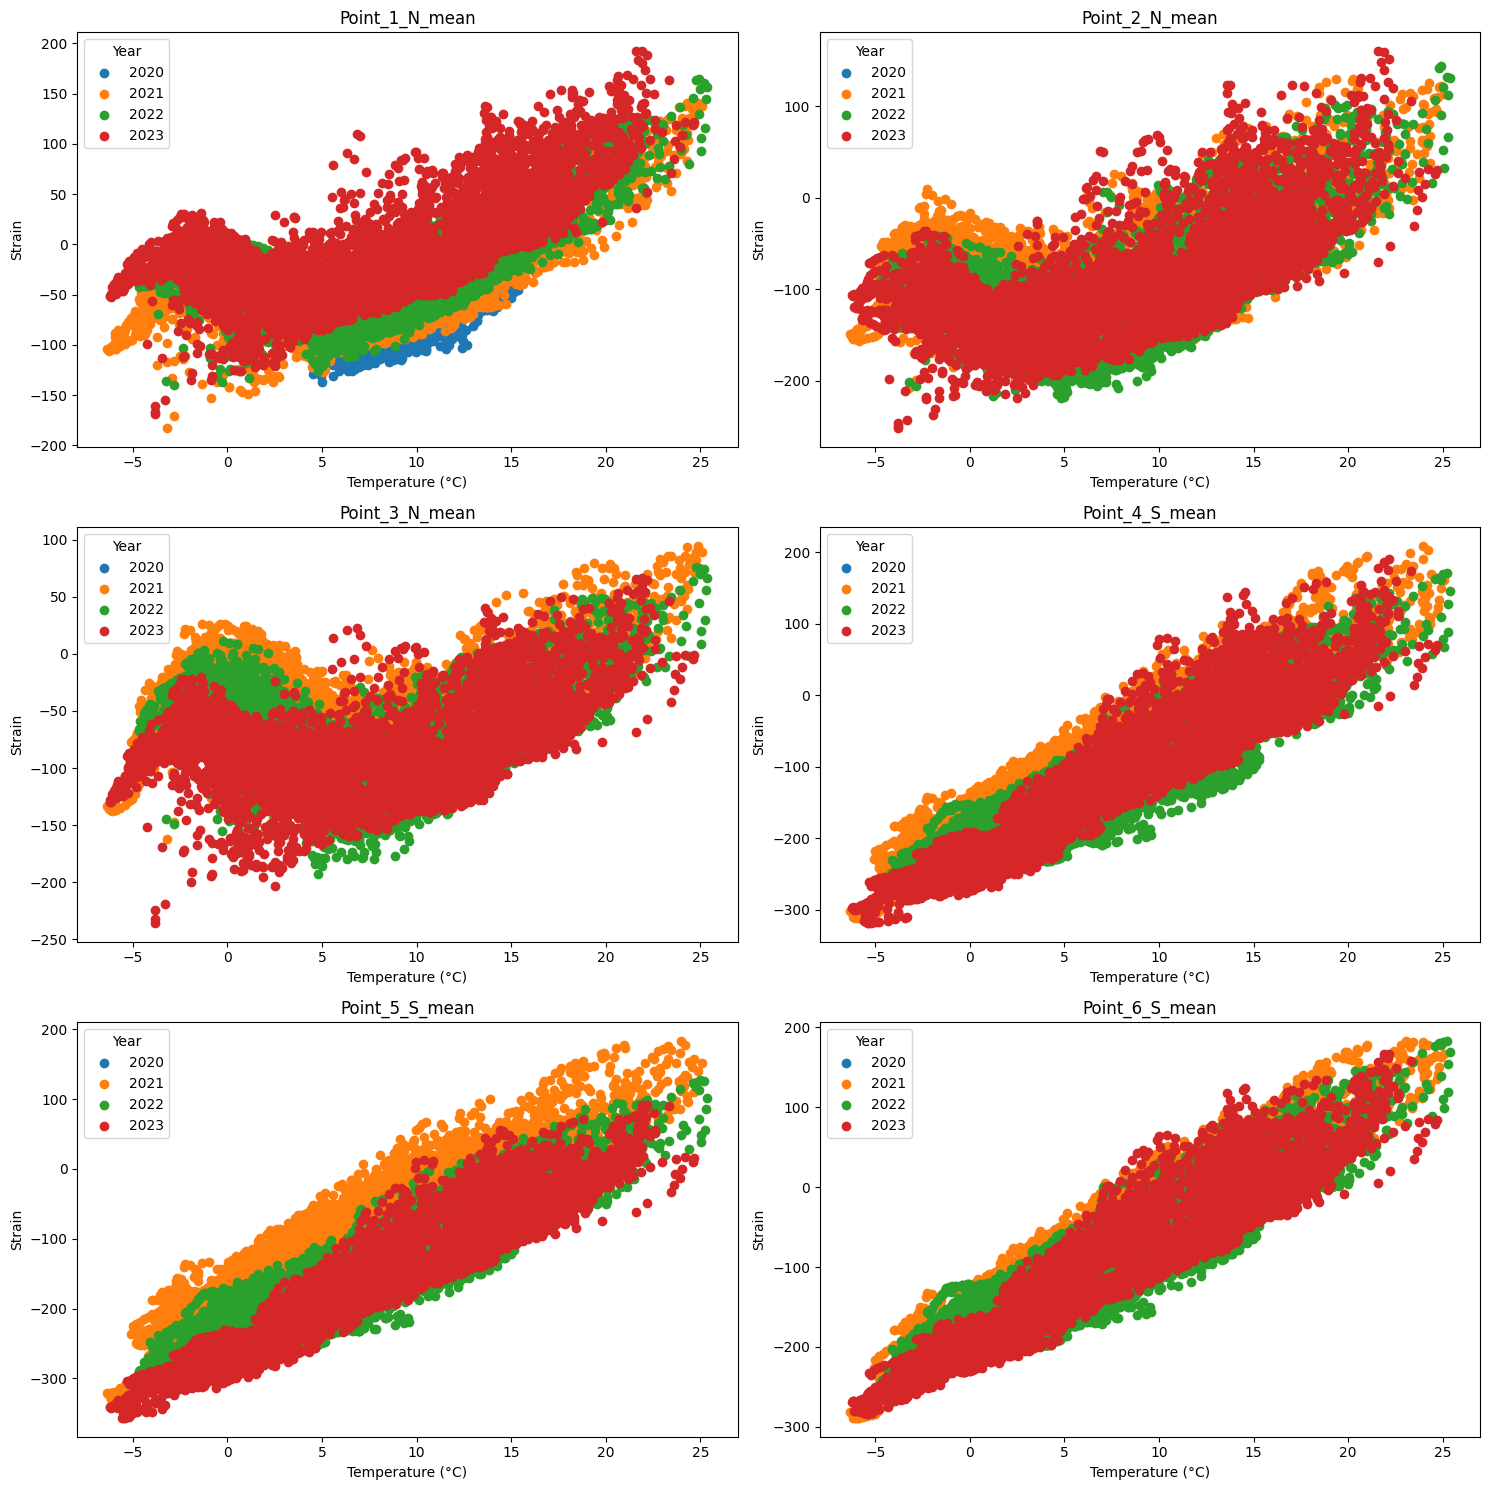

In [26]:

data['Year'] = data['Date'].astype(str).str[:4]

# Outliers are removed by filtering the data
filtered_data = data[(data['Omega_S_mean'] <= 1.8) & (data['Omega_N_mean'] <= 1.8)]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs = axs.flatten()

for i, point in enumerate(strain_columns):
    # Loop through each year to plot it in a different color
    for year in filtered_data['Year'].unique():
        year_data = filtered_data[filtered_data['Year'] == year]
        axs[i].scatter(year_data[temperature_column], year_data[point], label=year)
    
    axs[i].set_title(point)
    axs[i].set_xlabel('Temperature (°C)')
    axs[i].set_ylabel('Strain')
    axs[i].legend(title='Year')

plt.tight_layout()
plt.show()

**Omega-sensors**

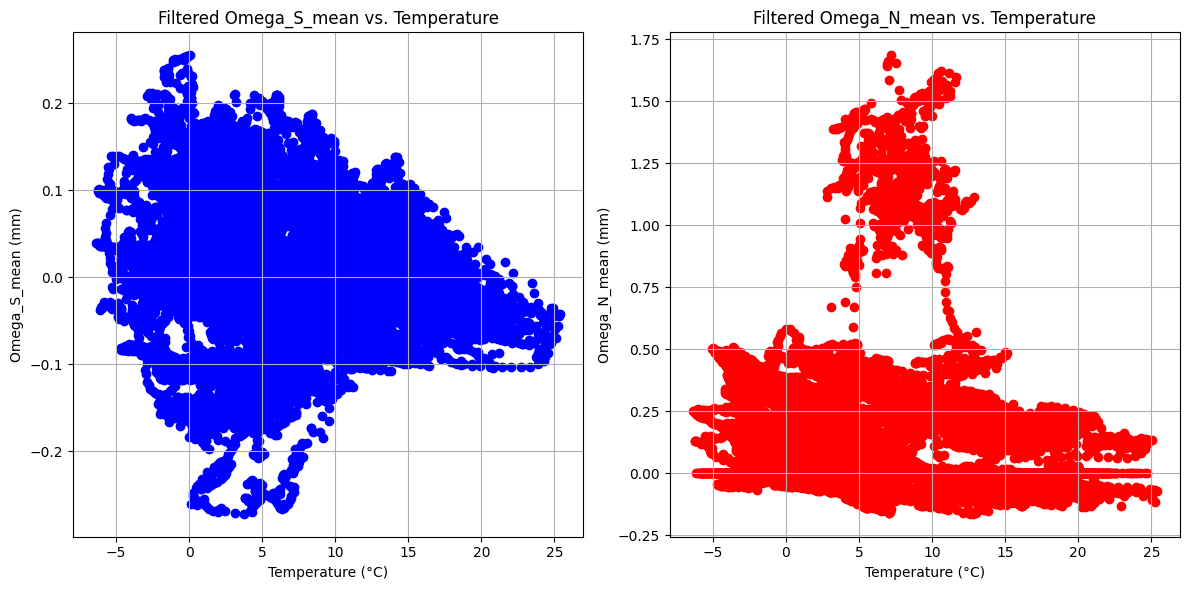

In [23]:
# Note: The following code is made using GitHub Copilot's suggestions
# Filter the DataFrame
filtered_data = data[(data['Omega_S_mean'] >= -1.8) & (data['Omega_N_mean'] >= -1.8)]

# Define temperature column
temp_col = 'PT100_Temperature_mean'

# Plot filtered data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(filtered_data[temp_col], filtered_data['Omega_S_mean'], color='blue', label='Omega_S_mean')
plt.title('Omega_S_mean vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Omega_S_mean (mm)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(filtered_data[temp_col], filtered_data['Omega_N_mean'], color='red', label='Omega_N_mean')
plt.title('Omega_N_mean vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Omega_N_mean (mm)')
plt.grid(True)

plt.tight_layout()
plt.show()

**Parrot plots - Monthly**

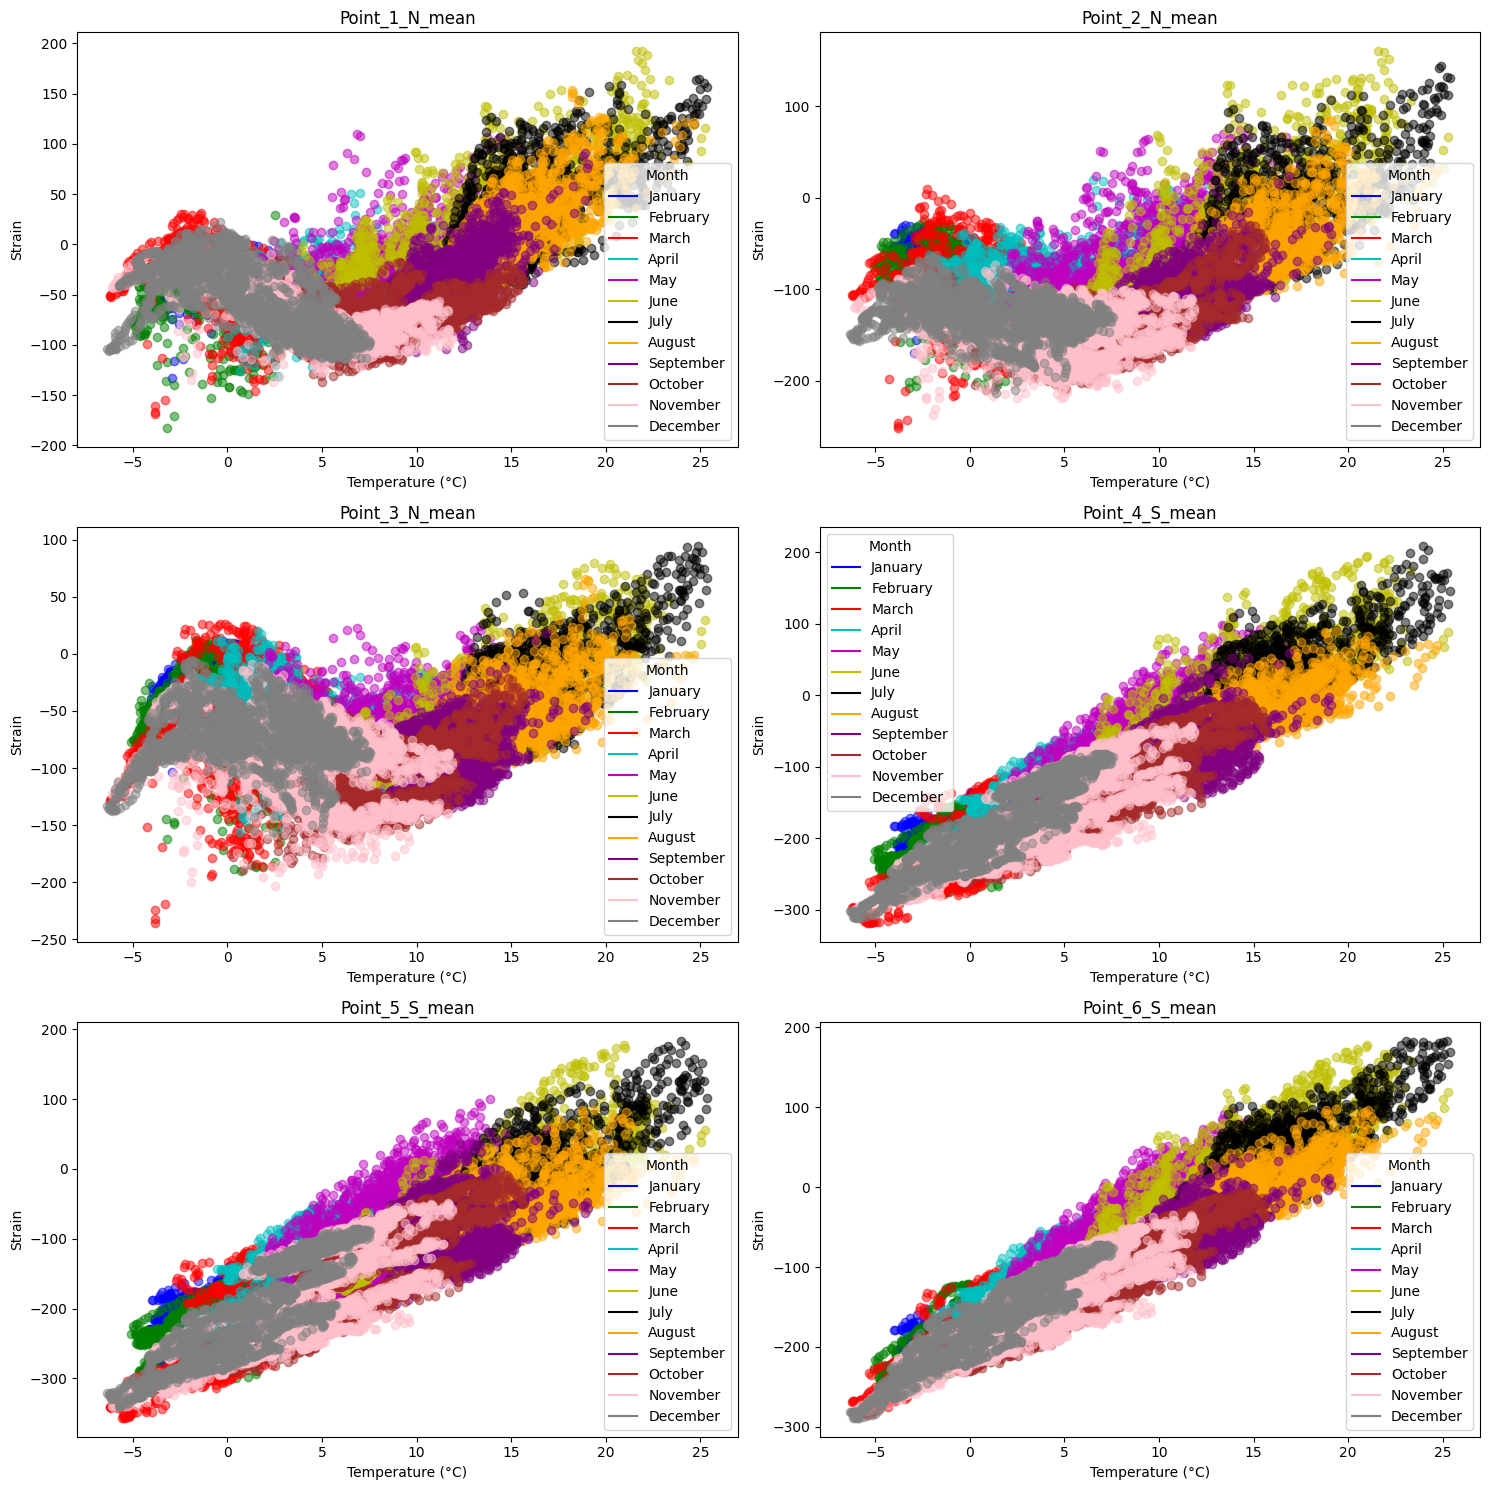

In [27]:
data['Month'] = data['Date'].str[4:6]

fig, axs = plt.subplots(3, 2, figsize=(15, 15), sharex=True, sharey=True)
axs = axs.flatten()

# Colors for months
month_colors = {'01': 'b', '02': 'g', '03': 'r', '04': 'c', '05': 'm', '06': 'y',
                '07': 'k', '08': 'orange', '09': 'purple', '10': 'brown', '11': 'pink', '12': 'gray'}

# Plot strain points for each month
for i, point in enumerate(strain_columns):
    for month, color in month_colors.items():
        month_data = data[data['Month'] == month]
        axs[i].scatter(month_data[temperature_column], month_data[point], color=color, label=month, alpha=0.5)
    
    axs[i].set_title(point)
    axs[i].set_xlabel('Temperature (°C)')
    axs[i].set_ylabel('Strain')

# Legends
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=pd.to_datetime(month, format='%m').strftime('%B'))
                   for month, color in month_colors.items()]
axs[-1].legend(handles=legend_elements, title='Month')

# Adjust layout
plt.tight_layout()
plt.show()

**Parrot plots - Seasonally**

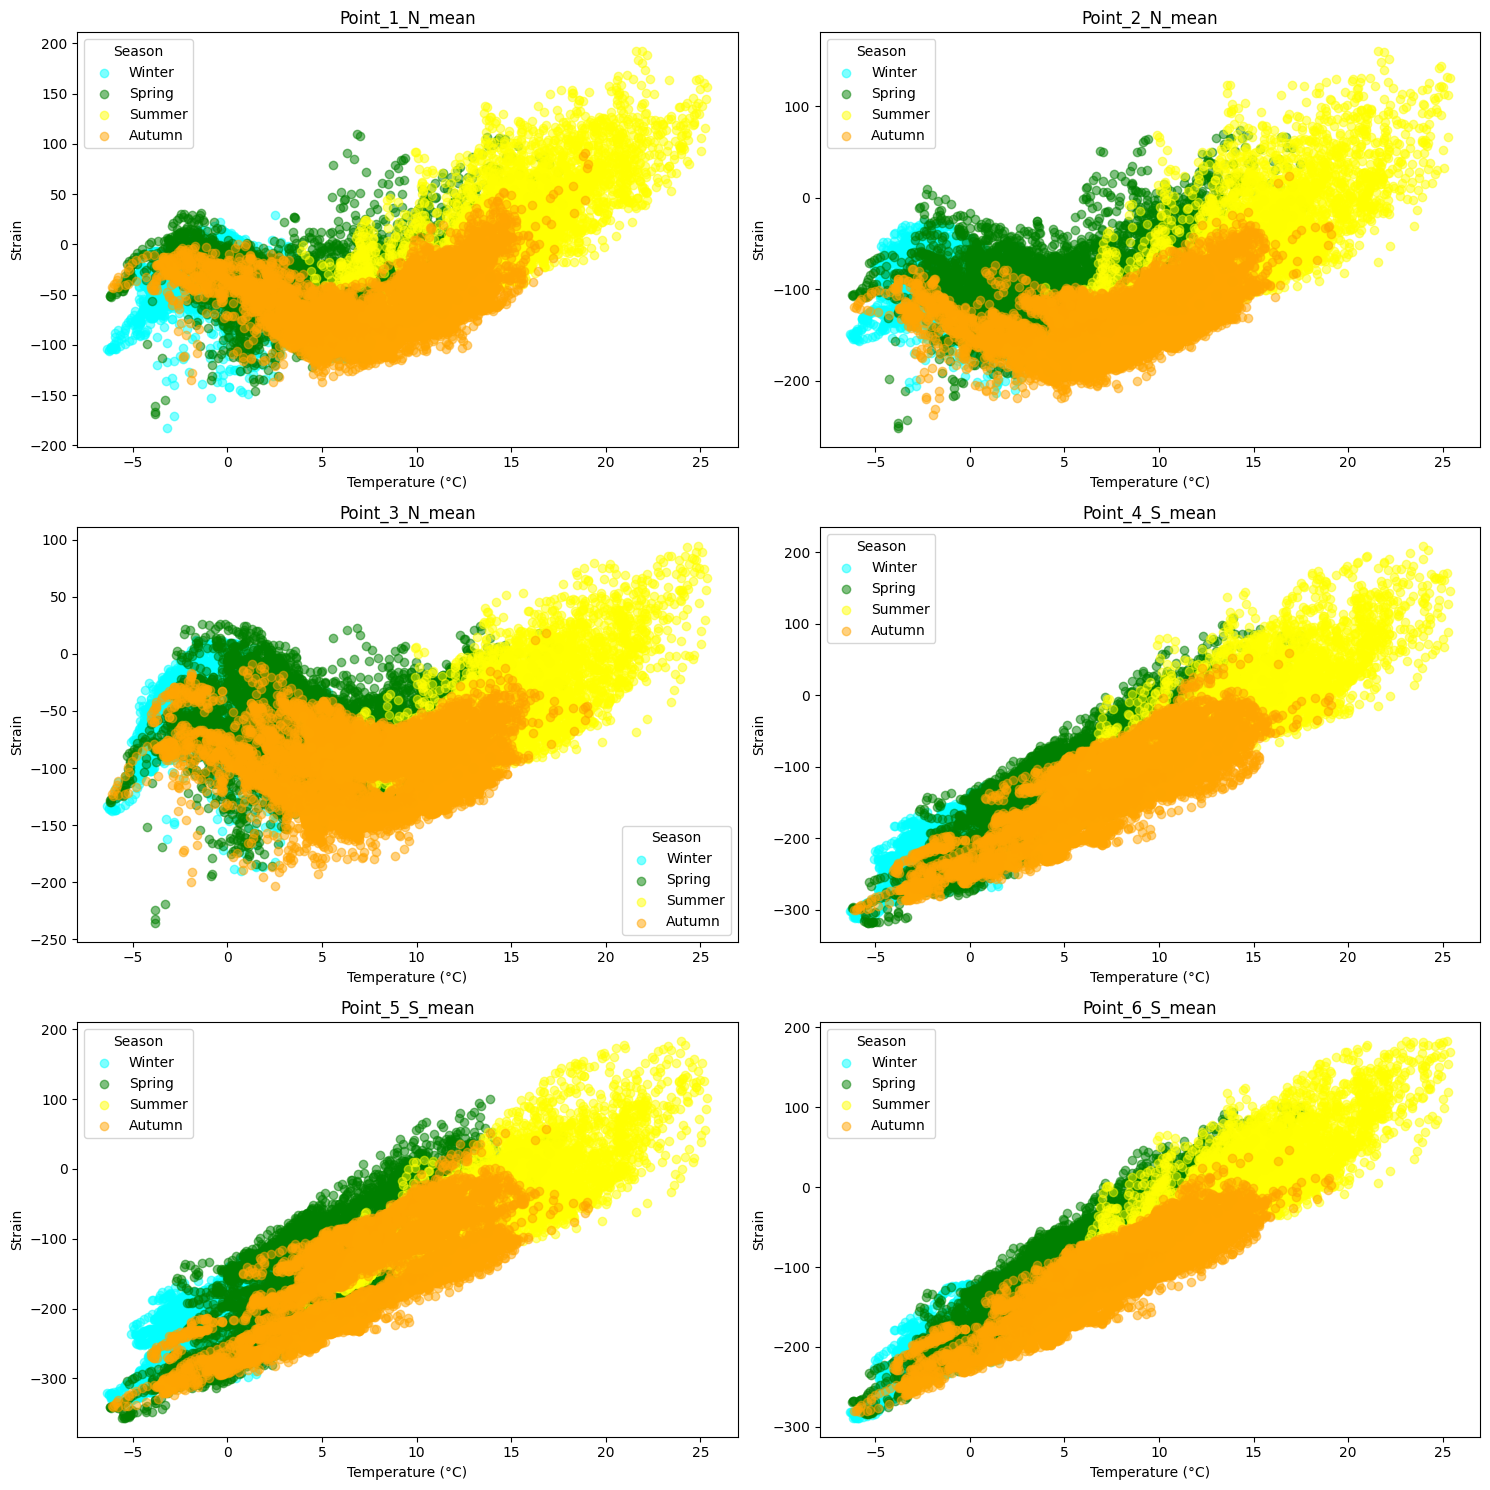

In [28]:

# Extract the month from the Date column (assuming Date is a string of format YYYYMMDDHH)
data['Month'] = data['Date'].astype(str).str[4:6]

def month_to_season(month):
    if month in ['12', '01', '02']: return 'Winter'
    if month in ['03', '04', '05']: return 'Spring'
    if month in ['06', '07', '08']: return 'Summer'
    if month in ['09', '10', '11']: return 'Autumn'
    return 'Unknown'

# Create a new column for the season
data['Season'] = data['Month'].apply(month_to_season)

# Setup the figure for subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs = axs.flatten()

# Coloring for seasons
season_colors = {
    'Winter': 'cyan',
    'Spring': 'green',
    'Summer': 'yellow',
    'Autumn': 'orange'
}

for i, point in enumerate(strain_columns):
    for season, color in season_colors.items():
        season_data = data[data['Season'] == season]
        axs[i].scatter(season_data[temperature_column], season_data[point], color=color, label=season, alpha=0.5)
    
    axs[i].set_title(point)
    axs[i].set_xlabel('Temperature (°C)')
    axs[i].set_ylabel('Strain')
    axs[i].legend(title='Season')

plt.tight_layout()
plt.show()

**Parrot plots - Daily divided in four**

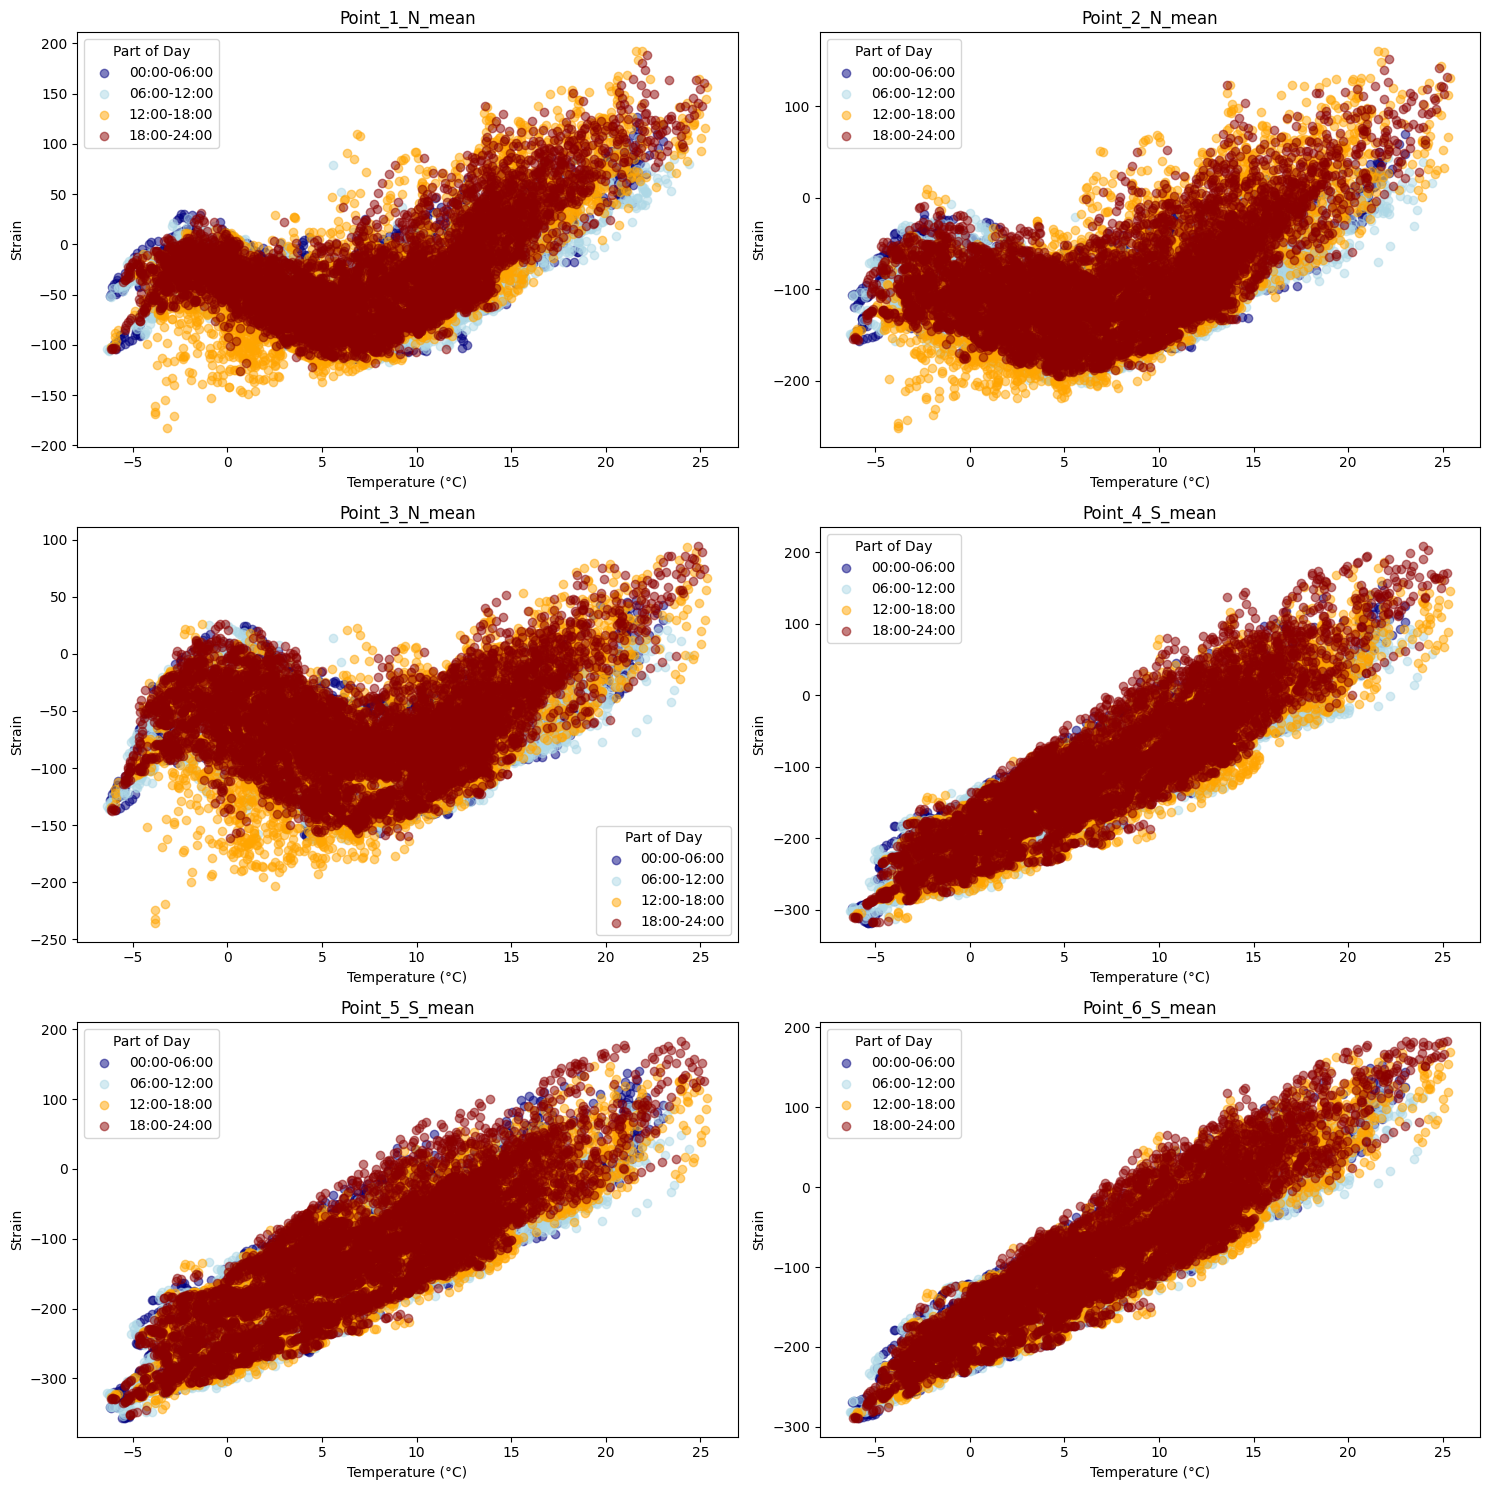

In [29]:
# Note: The following code is made using GitHub Copilot's suggestions
data['Hour'] = data['Date'].str[-2:]
data['PartOfDay'] = data['Hour'].astype(int).apply(lambda hour: '00:00-06:00' if 0 <= hour < 6 else
                                                               '06:00-12:00' if 6 <= hour < 12 else
                                                               '12:00-18:00' if 12 <= hour < 18 else
                                                               '18:00-24:00' if 18 <= hour <= 23 else
                                                               'Unknown')

# Setup subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15), sharex=True, sharey=True)
axs = axs.flatten()

# Define colors for parts of the day
part_of_day_colors = {'00:00-06:00': 'navy', '06:00-12:00': 'lightblue', '12:00-18:00': 'orange', '18:00-24:00': 'darkred'}

# Plot strain points for each part of day
for i, point in enumerate(strain_columns):
    for part_of_day, color in part_of_day_colors.items():
        part_data = data[data['PartOfDay'] == part_of_day]
        axs[i].scatter(part_data[temperature_column], part_data[point], color=color, label=part_of_day, alpha=0.5)
    
    axs[i].set_title(point)
    axs[i].set_xlabel('Temperature (°C)')
    axs[i].set_ylabel('Strain')

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=part_of_day) for part_of_day, color in part_of_day_colors.items()]
axs[-1].legend(handles=legend_elements, title='Part of Day')

# Adjust layout
plt.tight_layout()
plt.show()